In [4]:
import cv2
import lsd
import numpy as np
import matplotlib.pyplot as plt
from pygo import GoBoard

Loading /home/michael/dev/PyGo/thirdparty/python-lsd/lsd/liblsd.so


In [5]:
img0 = cv2.imread('/home/michael/dev/pygo_train/rect.png')
lines = lsd.lsd_with_line_merge(img0)

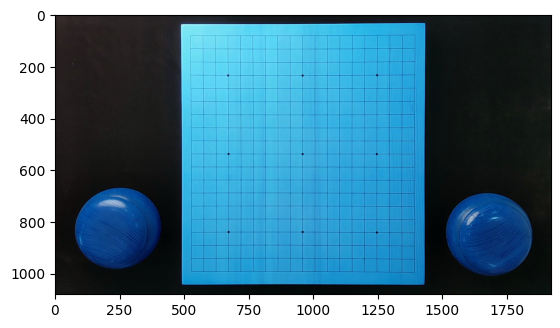

In [6]:
plt.imshow(img0)
plt.show()

In [7]:
points = []
for line in lines:
    points.append(np.array([line[0], line[1]]))
    points.append(np.array([line[2], line[2]]))

points = np.asarray(points) 

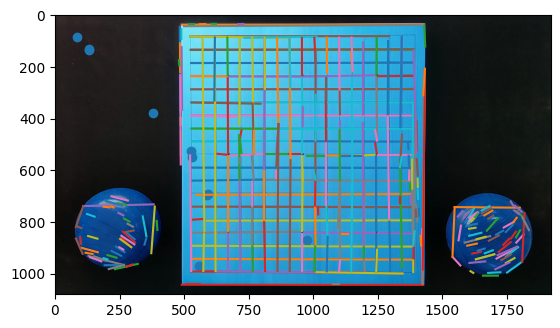

In [8]:
for lines_direction in lines:
    for line in lines_direction:
        plt.plot([line[0], line[2]], [line[1], line[3]])
plt.scatter(points[:,0], points[:,1])
plt.imshow(img0)
plt.show()



In [9]:
from sklearn.cluster import DBSCAN

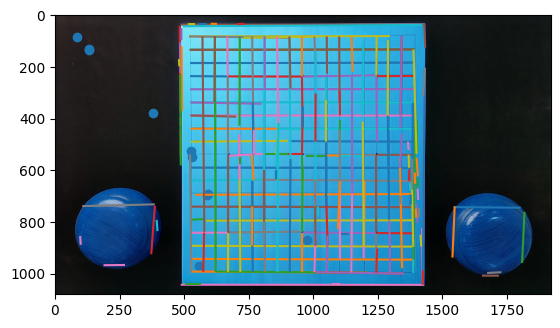

In [10]:
orientation = []
#find two major orientations
for line in lines[0]:
    orientation.append(np.arctan2(abs(line[3]-line[1]), abs(line[2]-line[0]))*180/np.pi)

lines_v = []
for o,l in zip(orientation, lines[0]):
    if o < 5:
        lines_v.append(l)

orientation = []
#find two major orientations
for line in lines[1]:
    orientation.append(np.arctan2(abs(line[3]-line[1]), abs(line[2]-line[0]))*180/np.pi)

lines_h = []
for o,l in zip(orientation, lines[1]):
    if o >85 and o<95:
        lines_h.append(l)
 
for line in lines_v:
    plt.plot([line[0], line[2]], [line[1], line[3]])
for line in lines_h:
    plt.plot([line[0], line[2]], [line[1], line[3]])
plt.scatter(points[:,0], points[:,1])
plt.imshow(img0)
plt.show()



In [25]:
def make_linesegment_longer(line):
    orientation = np.arctan2(line[3] - line[1], line[2]-line[0])
    length = np.sqrt((line[3]-line[1])**2 + (line[2]-line[0])**2)
    f = 0.1
    c = np.cos(orientation) * f * length
    s = np.sin(orientation) * f * length
    return [line[0] - c , line[1] - s, line[2] + c, line[3] + s]

In [28]:

def get_line_intersection(line_a, line_b):
    p0_x, p0_y, p1_x, p1_y = line_a
    p2_x, p2_y, p3_x, p3_y = line_b

    s1_x = p1_x - p0_x;     s1_y = p1_y - p0_y
    s2_x = p3_x - p2_x;     s2_y = p3_y - p2_y

    s = (-s1_y * (p0_x - p2_x) + s1_x * (p0_y - p2_y)) / (-s2_x * s1_y + s1_x * s2_y)
    t = ( s2_x * (p0_y - p2_y) - s2_y * (p0_x - p2_x)) / (-s2_x * s1_y + s1_x * s2_y)

    if (s >= 0 and s <= 1 and t >= 0 and t <= 1):
        return p0_x + (t * s1_x), p0_y + (t * s1_y)

    return None

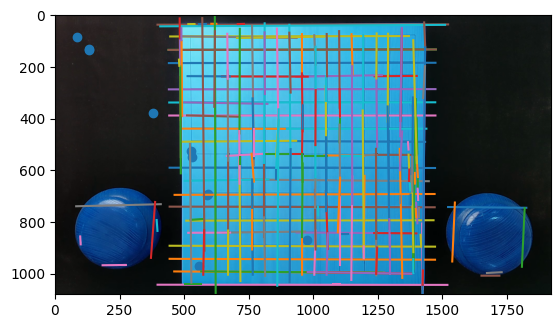

In [27]:
new_lines_v = [make_linesegment_longer(line) for line in lines_v]
new_lines_h = [make_linesegment_longer(line) for line in lines_h]

for line in new_lines_v:
    plt.plot([line[0], line[2]], [line[1], line[3]])
for line in new_lines_h:
    plt.plot([line[0], line[2]], [line[1], line[3]])
plt.scatter(points[:,0], points[:,1])
plt.imshow(img0)
plt.show()



In [34]:
intersections = []
for lv in new_lines_v:
    for lh in new_lines_h:
        intersections.append(get_line_intersection(lv, lh))

intersections = [x for x in intersections if x is not None]
 

[(1336.0033916943505, 590.5338015555637), (1335.2079408406298, 590.5328567401249), (911.9343933476241, 590.0301036401892), (575.7619294389295, 589.6308068985333), (809.546810315507, 589.9084903830669), (1392.1284672845045, 590.6004654326338), (1150.409043790561, 590.3133575087014), (1242.8457690577234, 590.4231514007394), (1102.6261093163653, 590.2566022057224), (911.6492272754683, 590.0297649274876), (958.5422061228475, 590.0854631647632), (809.375, 589.9082863113284), (714.2858676947038, 589.7953419605183), (1290.7741711106432, 590.4800794862523), (670.1772516165406, 589.7429509155345), (714.1414973797414, 589.795170481285), (1192.842705320681, 590.3637590870713), (1008.1711504319169, 590.1444111092915), (1049.162664739957, 590.1930997434183), (620.5553451181697, 589.6840113303311), (1381.890682804147, 590.5883052636026), (765.6651140722875, 589.856368867448), (957.3911667962435, 590.0840959907619), (863.9409369883028, 589.9730982848955), (1427.906646817925, 590.642961805906), (523.4

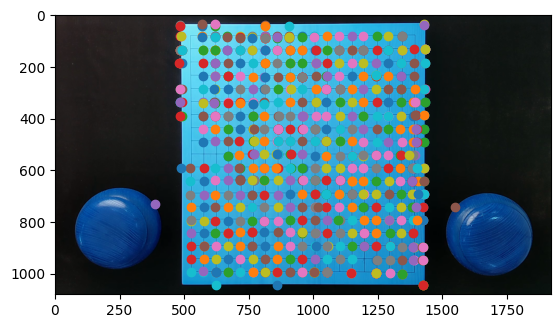

In [35]:
plt.clf()
for pt in intersections:
    plt.scatter(pt[0],pt[1])
plt.imshow(img0)
plt.show()

In [43]:
w,h = img0.shape[1], img0.shape[0]
board_ref = []
for i in range(19):
    for j in range(19):
        board_ref.append((i*(w/19),j*(h/19)))
board_ref = np.asarray(board_ref)


In [37]:
from pycpd import AffineRegistration

In [68]:
src = np.asarray(intersections)
noise = 1-(19*19)/len(src)
print(noise)
reg = AffineRegistration(X=board_ref, Y=src, w=0.001)
pt, params = reg.register()

0.46911764705882353


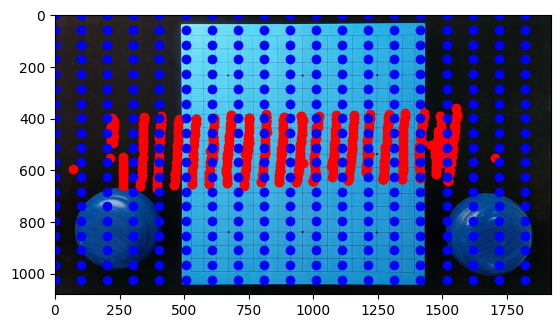

In [70]:
plt.clf()
plt.scatter(pt[:,0],pt[:,1],c='red')
plt.scatter(board_ref[:,0],board_ref[:,1],c='blue')
plt.imshow(img0)
plt.show()